In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [195]:
# Load dataset
df = pd.read_csv('/content/traffic_accidents.csv')


In [196]:
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

In [197]:
print(df.head())
print(df.info())

               crash_date traffic_control_device weather_condition  \
0  07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1  08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2  12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3  08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4  08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  STRAIGHT AND LEVEL           

In [198]:
# First, replace all string "NA", "Na", "N/A", "n/a", "Unknown", "unknown" with actual NaN
df = df.replace(['NA', 'Na', 'N/A', 'n/a', 'Unknown', 'unknown', 'UNKNOWN'], pd.NA)

In [199]:
print(df.isnull().sum())

crash_date                           0
traffic_control_device            4455
weather_condition                 6534
lighting_condition                4336
first_crash_type                     0
trafficway_type                   1060
alignment                            0
roadway_surface_cond             12509
road_defect                      34426
crash_type                           0
intersection_related_i               0
damage                               0
prim_contributory_cause              0
num_units                            0
most_severe_injury                   0
injuries_total                       0
injuries_fatal                       0
injuries_incapacitating              0
injuries_non_incapacitating          0
injuries_reported_not_evident        0
injuries_no_indication               0
crash_hour                           0
crash_day_of_week                    0
crash_month                          0
dtype: int64


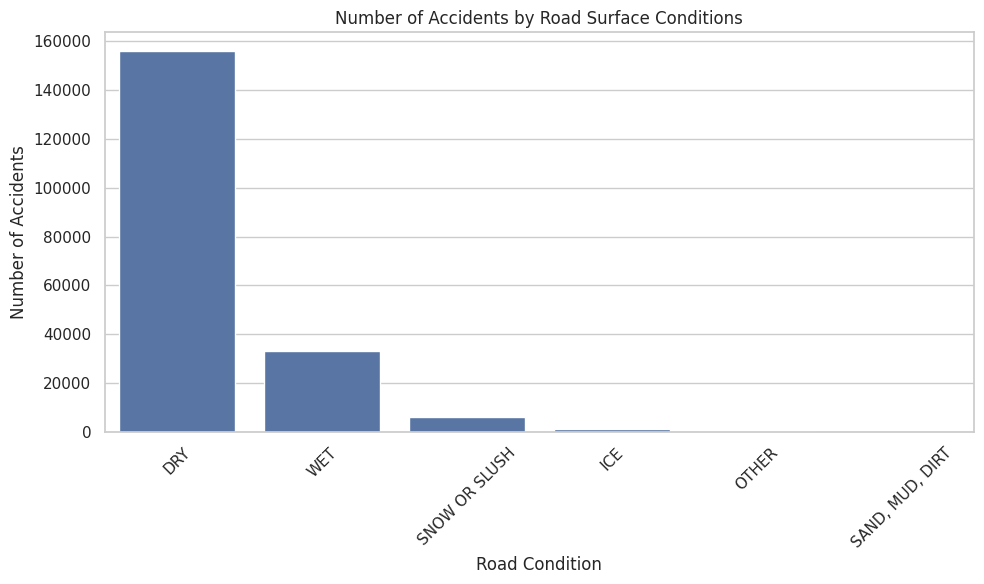

In [200]:
# Analyze accidents by road surface conditions
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='roadway_surface_cond')
plt.xticks(rotation=45)
plt.title('Number of Accidents by Road Surface Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


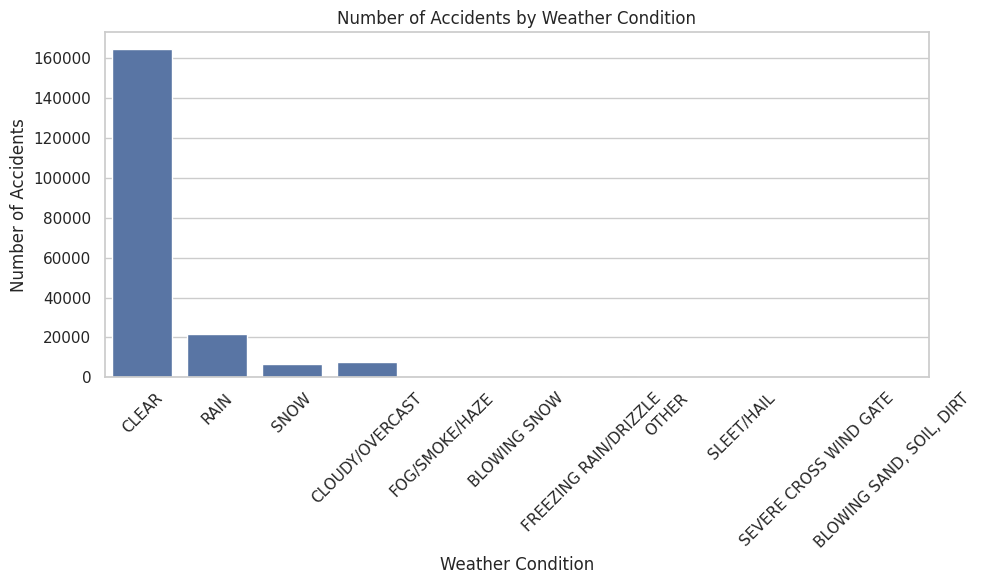

In [201]:
# Analyze accidents by weather conditions
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='weather_condition')
plt.xticks(rotation=45)
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


In [202]:
print(df['crash_hour'].value_counts())

crash_hour
17    16097
16    16025
15    15894
18    13431
14    13349
13    11949
12    11726
8     11381
11    10052
19     9683
7      9405
9      9300
10     8990
20     8219
21     7472
22     7035
23     5943
6      4772
0      4487
1      3729
2      3080
5      2819
3      2364
4      2104
Name: count, dtype: int64


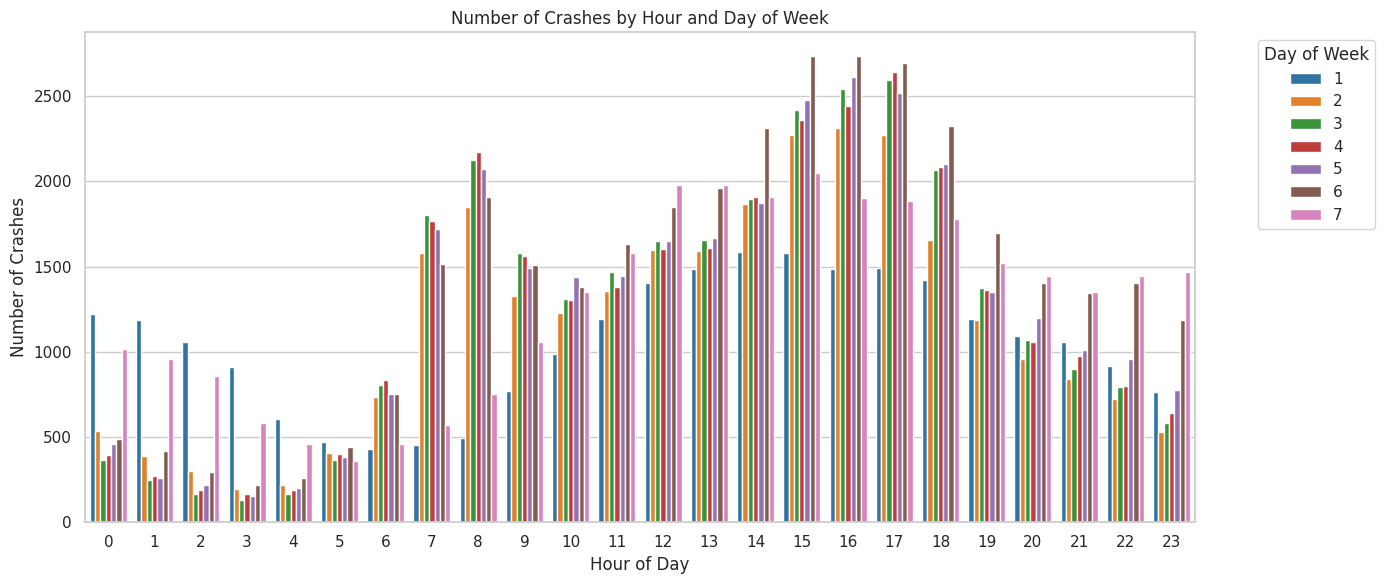

In [203]:
# Analyze accidents by Hours
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='crash_hour', hue='crash_day_of_week', palette='tab10')
plt.title('Number of Crashes by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

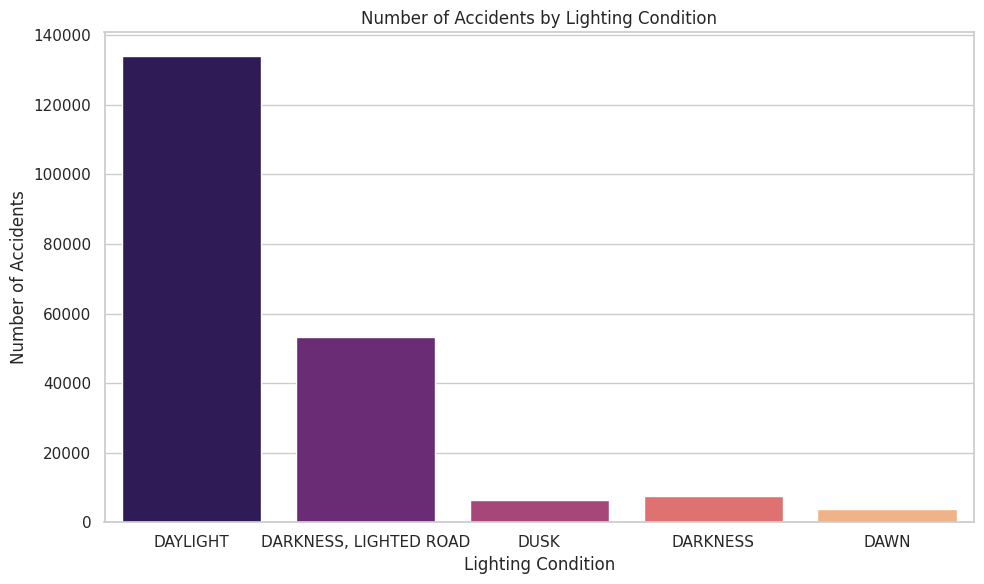

In [204]:
#Analyze lighting condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='lighting_condition', palette='magma')
plt.title('Number of Accidents by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

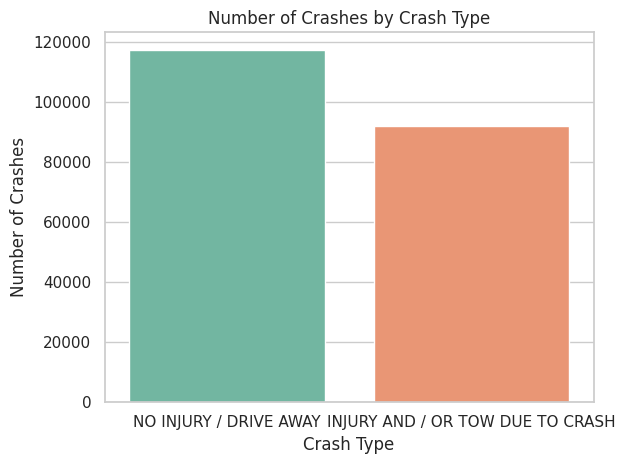

In [205]:
# analyze crash_type
sns.countplot(data=df, x='crash_type', palette='Set2')
plt.title('Number of Crashes by Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Number of Crashes')
plt.tight_layout()
plt.show()

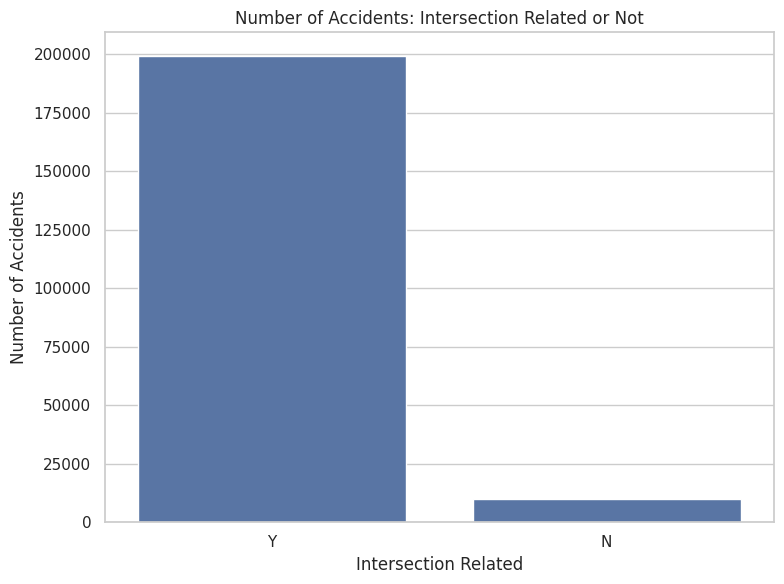

In [206]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='intersection_related_i')
plt.title('Number of Accidents: Intersection Related or Not')
plt.xlabel('Intersection Related')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

In [212]:
factors = [
    'roadway_surface_cond',
    'weather_condition',
    'crash_hour',
    'lighting_condition',
    'crash_type',
    'intersection_related_i'
]

for factor in factors:
    print(f"\nTop Categories in {factor}:")
    print(df[factor].value_counts().head())



Top Categories in roadway_surface_cond:
roadway_surface_cond
DRY              155905
WET               32908
SNOW OR SLUSH      6203
ICE                1303
OTHER               438
Name: count, dtype: int64

Top Categories in weather_condition:
weather_condition
CLEAR              164700
RAIN                21703
CLOUDY/OVERCAST      7533
SNOW                 6871
OTHER                 627
Name: count, dtype: int64

Top Categories in crash_hour:
crash_hour
17    16097
16    16025
15    15894
18    13431
14    13349
Name: count, dtype: int64

Top Categories in lighting_condition:
lighting_condition
DAYLIGHT                  134109
DARKNESS, LIGHTED ROAD     53378
DARKNESS                    7436
DUSK                        6323
DAWN                        3724
Name: count, dtype: int64

Top Categories in crash_type:
crash_type
NO INJURY / DRIVE AWAY              117376
INJURY AND / OR TOW DUE TO CRASH     91930
Name: count, dtype: int64

Top Categories in intersection_related_i:
inters